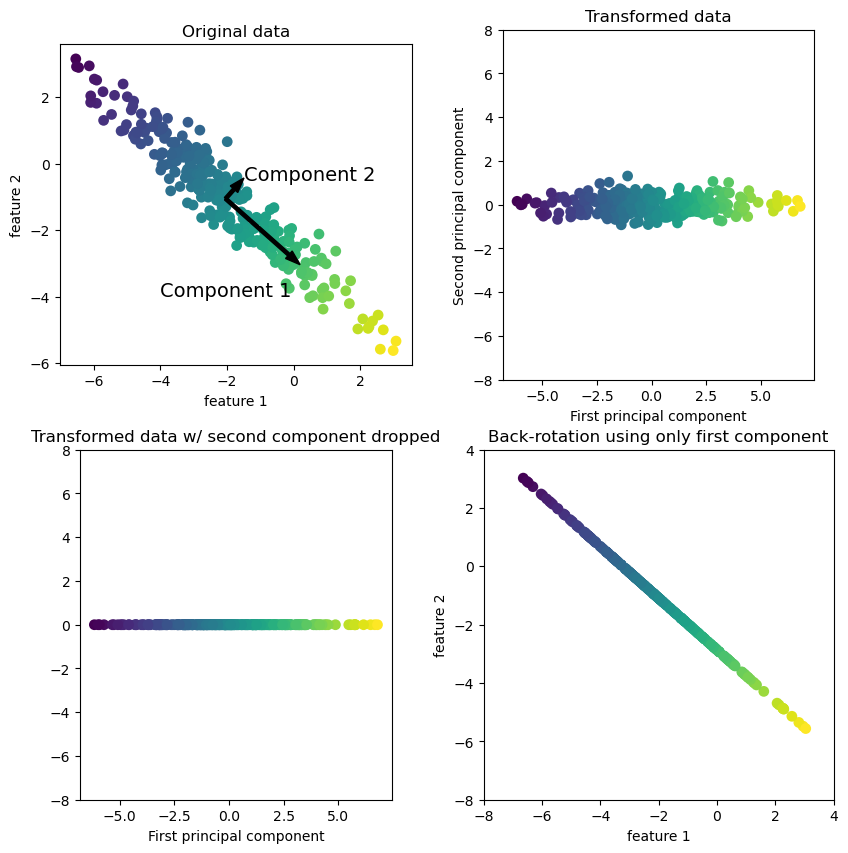

In [2]:
import mglearn
mglearn.plots.plot_pca_illustration()

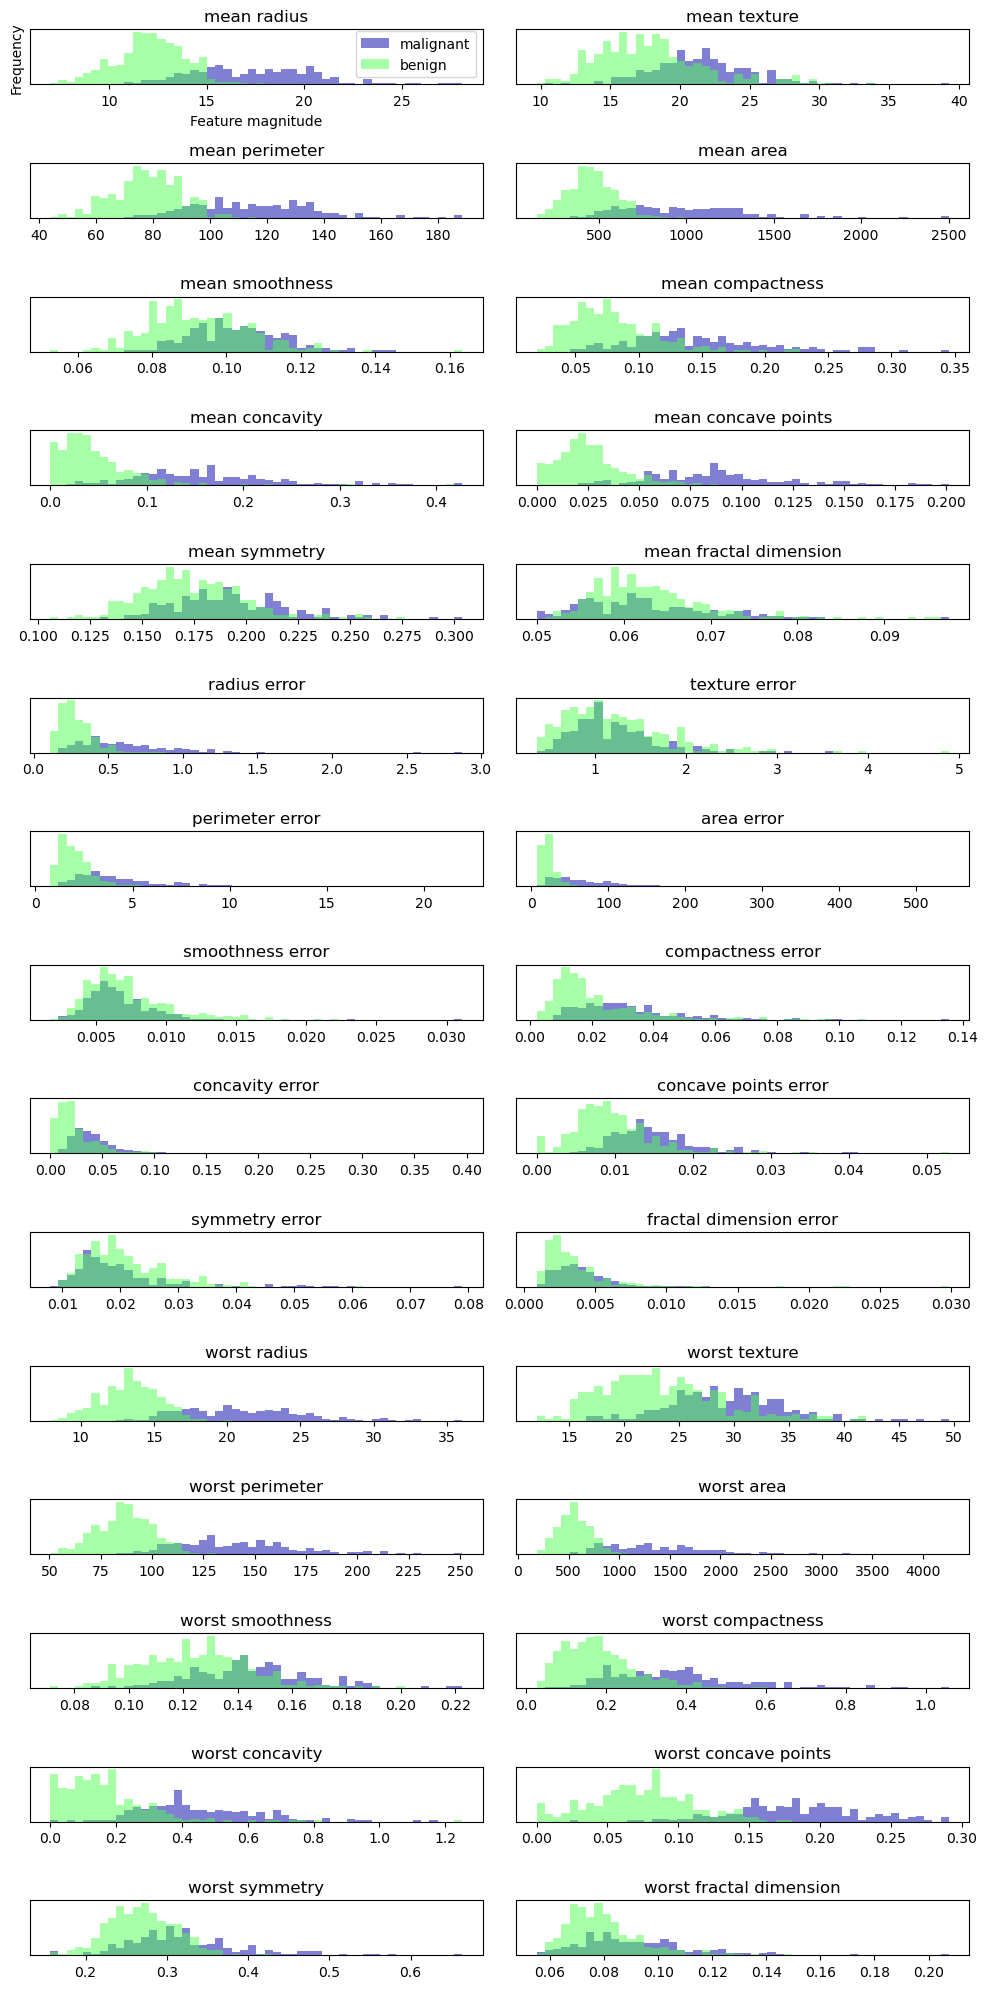

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


Text(0, 0.5, 'Second principal component')

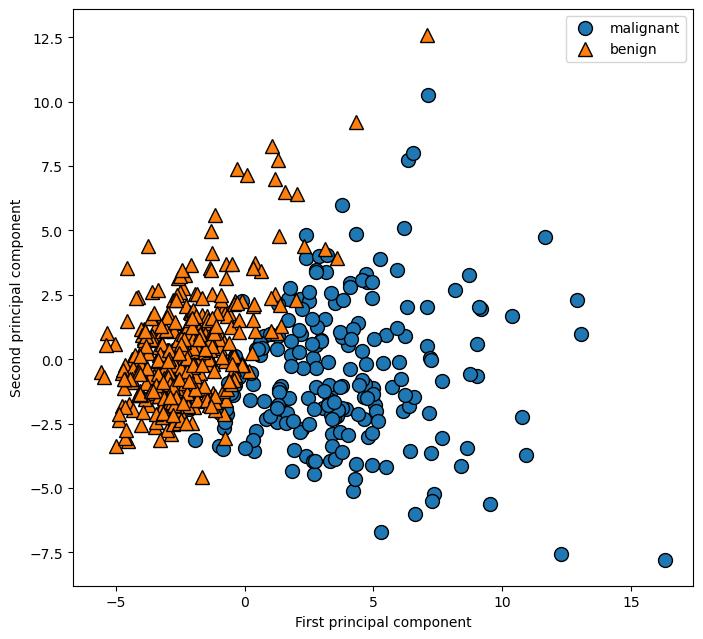

In [5]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [6]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(2, 30)


In [7]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

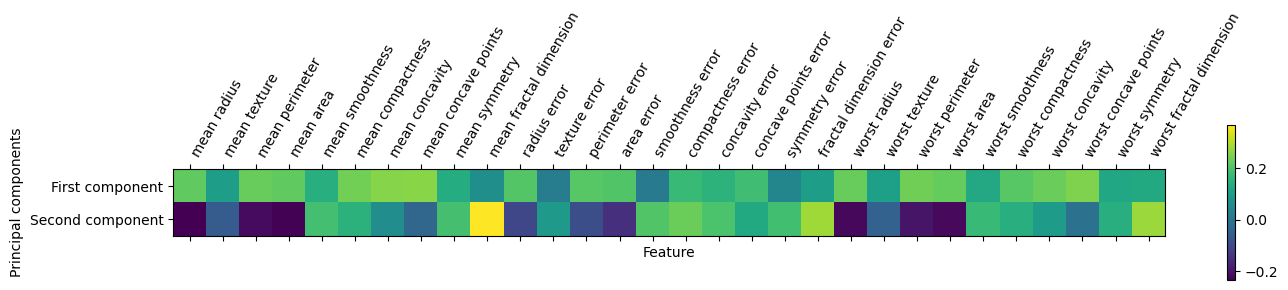

In [8]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

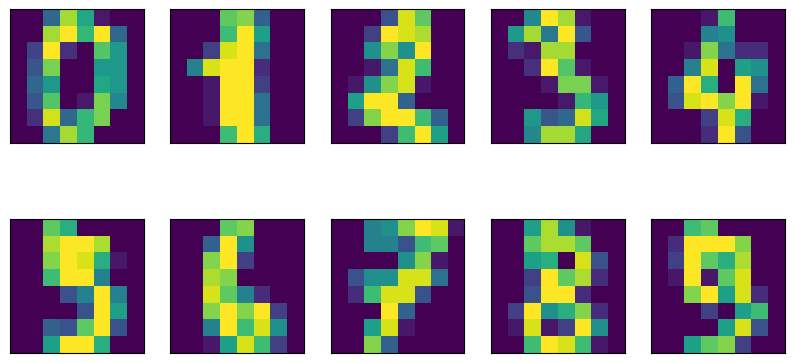

In [9]:
from sklearn.datasets import load_digits
digits=load_digits()
fig,axes=plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

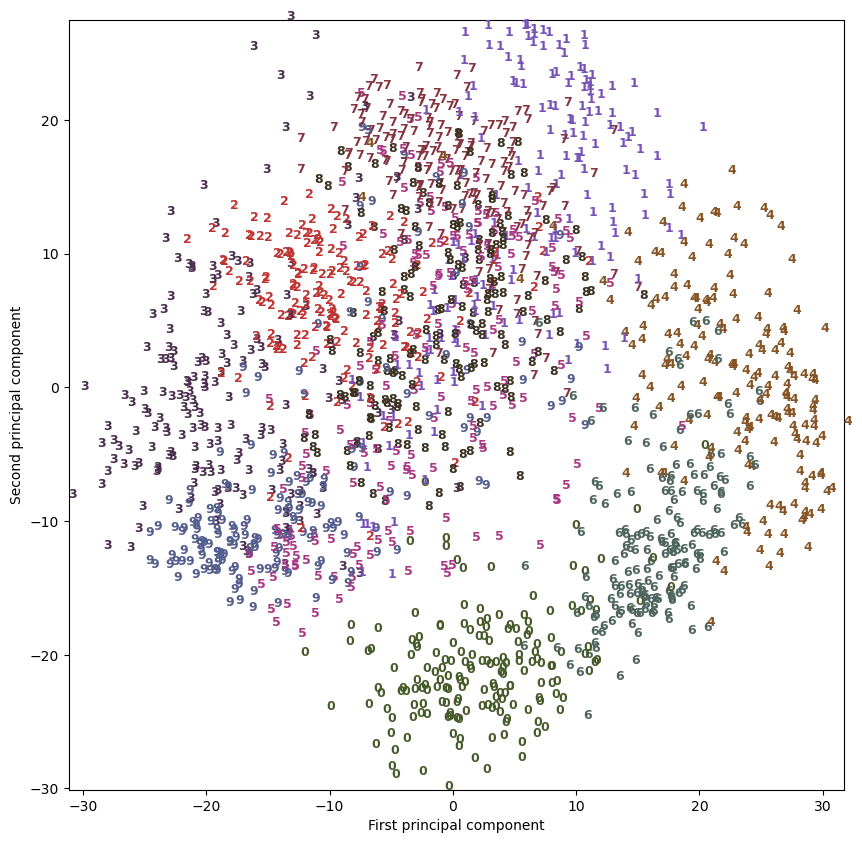

In [10]:
pca=PCA(n_components=2)
pca.fit(digits.data)
digits_pca=pca.transform(digits.data)
colors=["#465A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

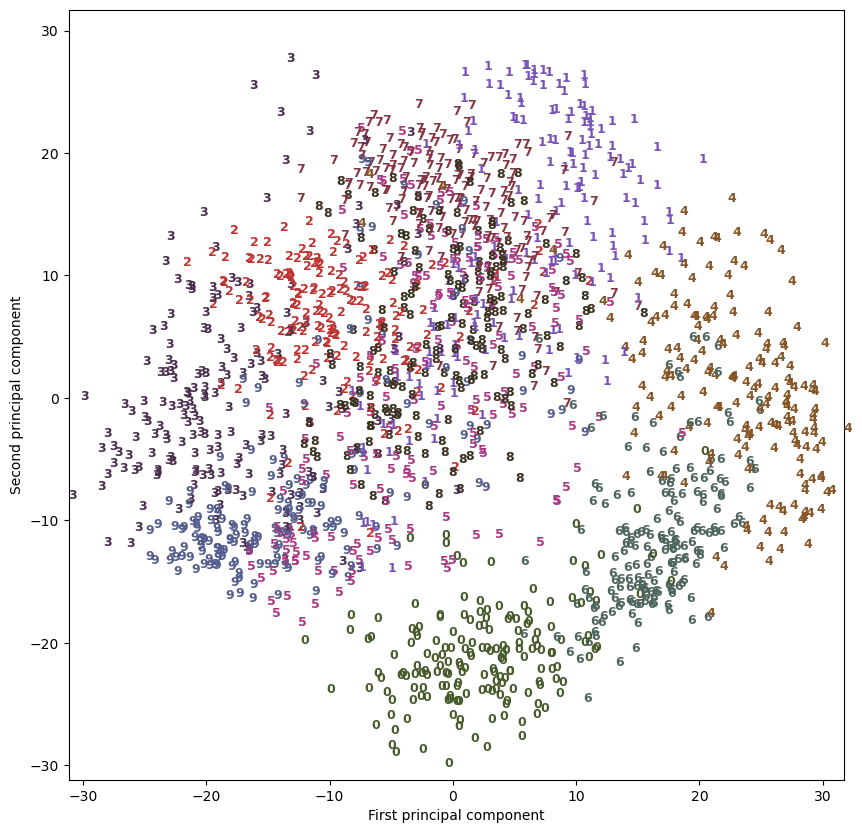

In [11]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
for i in range(len(digits.data)):
    x = digits_pca[i, 0]  
    y = digits_pca[i, 1]  
    plt.text(x, y, str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

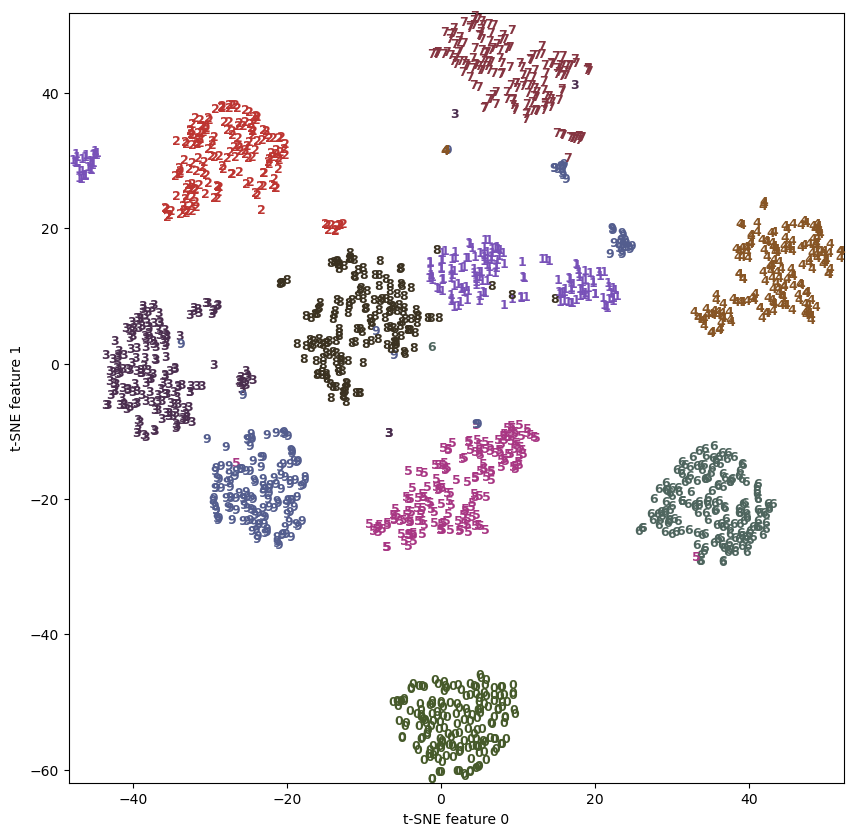

In [15]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

plt.show()